Grade Division of the exam:

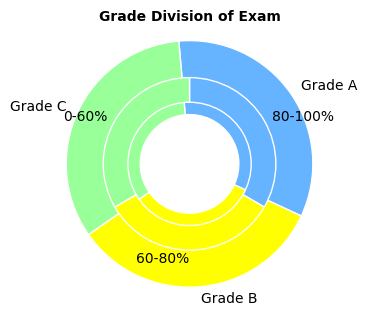

In [ ]:
import matplotlib.pyplot as plt

# Data for the Grade Division of Exam donut chart
grades = ['Grade A', 'Grade B', 'Grade C']
grade_colors = ['#66b3ff', 'yellow', '#99ff99']
percentage_ranges = ['80-100%', '60-80%', '0-60%']
percentage_colors = ['#66b3ff', 'yellow', '#99ff99']

# Create the Grade Division of Exam donut chart
fig, ax = plt.subplots(figsize=(3.5, 3.5))

# Draw the outer circle (grade labels)
ax.pie([1]*3, radius=1, labels=grades, colors=grade_colors, startangle=95, counterclock=False,
       wedgeprops=dict(width=0.6, edgecolor='w'))

# Draw the inner circle (percentage ranges)
ax.pie([1]*3, radius=0.7, labels=percentage_ranges, colors=percentage_colors, startangle=90, counterclock=False,
       wedgeprops=dict(width=0.2, edgecolor='w'))

# Set aspect ratio to be equal
ax.axis('equal')

plt.title('Grade Division of Exam', fontsize=10, fontweight='bold')

# Save the plot as an image
plt.savefig('image2.png')

plt.show()

Marks Distribution of the class:

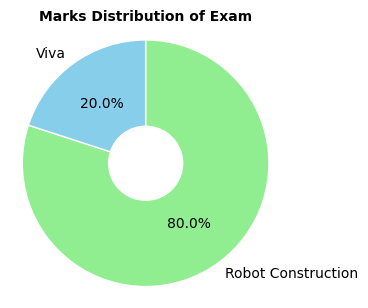

In [ ]:
import matplotlib.pyplot as plt

# Data for the Marks Distribution of Exam pie chart
categories = ['Robot Construction', 'Viva']
marks_percentages = [80, 20]
marks_colors = ['lightgreen', 'skyblue']

# Create the Marks Distribution of Exam pie chart
fig, ax = plt.subplots(figsize=(3.5, 3.5))

# Draw the pie chart
ax.pie(marks_percentages, labels=categories, colors=marks_colors,
       startangle=90, counterclock=False, autopct='%1.1f%%', wedgeprops=dict(width=0.7, edgecolor='w'))

# Set aspect ratio to be equal to make the pie chart a circle
ax.axis('equal')

plt.title('Marks Distribution of Exam', fontsize=10, fontweight='bold')
# Save the plot as an image
plt.savefig('image3.png')
plt.show()

change this in your excel file:

Enter the column name for 'Roll_no': Roll no.

Enter the column name for 'STUDENT_NAME': STUDENT NAME

Enter the column name for 'MARKS_OUT_OF_100': Marks100

Enter the column name for 'Grade': Grade

In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the Excel file
uploaded = files.upload()

# Step 2: Get the name of the uploaded file
filename = next(iter(uploaded))

Saving class3N.xlsx to class3N.xlsx


In [ ]:
import pandas as pd

In [ ]:
# Load the Excel file
file_name = filename
xl = pd.ExcelFile(file_name)

In [ ]:
# Get the sheet names
sheet_names = xl.sheet_names
print("the sheets names are:")
print(sheet_names)

the sheets names are:
['3A', '3B', '3C', '3D', '3E', '3F', '3G', '3H', '3I']


In [ ]:
# Create a dictionary to store the DataFrames
dataframes_dict = {}

In [ ]:
# Loop through the sheets and process each sheet separately
for sheet_name in sheet_names:
    # Read the sheet into a dataframe
    df = xl.parse(sheet_name)

    # Save the sheet as a CSV file
    csv_file_name = f'{sheet_name}.csv'
    df.to_csv(csv_file_name, index=False)

    # Drop unwanted columns
    cols_to_drop = [col for col in df.columns if col not in ['Roll_no', 'STUDENT_NAME', 'MARKS_OUT_OF_100', 'Grade']]
    df = df.drop(columns=cols_to_drop)

    # Replace 0 marks with 'Absent'
    df['MARKS_OUT_OF_100'] = df['MARKS_OUT_OF_100'].apply(lambda x: 'Absent' if x == 0 else x)

    # Replace 'C' grade with blank
    df['Grade'] = df['Grade'].apply(lambda x: '' if x == 'C' else x)

    # Save the modified dataframe as a new CSV file
    modified_csv_file_name = f'{sheet_name}_modified.csv'
    df.to_csv(modified_csv_file_name, index=False)

    print(f"Processed sheet: {sheet_name}, Modified CSV file: {modified_csv_file_name}")

    # Add the DataFrame to the dictionary with sheet name as key
    dataframes_dict[sheet_name] = df

    print(f"Processed sheet: {sheet_name}")

print("CSV files have been created and processed.")


Processed sheet: 3A, Modified CSV file: 3A_modified.csv
Processed sheet: 3A
Processed sheet: 3B, Modified CSV file: 3B_modified.csv
Processed sheet: 3B
Processed sheet: 3C, Modified CSV file: 3C_modified.csv
Processed sheet: 3C
Processed sheet: 3D, Modified CSV file: 3D_modified.csv
Processed sheet: 3D
Processed sheet: 3E, Modified CSV file: 3E_modified.csv
Processed sheet: 3E
Processed sheet: 3F, Modified CSV file: 3F_modified.csv
Processed sheet: 3F
Processed sheet: 3G, Modified CSV file: 3G_modified.csv
Processed sheet: 3G
Processed sheet: 3H, Modified CSV file: 3H_modified.csv
Processed sheet: 3H
Processed sheet: 3I, Modified CSV file: 3I_modified.csv
Processed sheet: 3I
CSV files have been created and processed.


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

# Function to calculate statistics for a section
def calculate_section_statistics(df):
    total_students = len(df)
    students_absent = len(df[df['MARKS_OUT_OF_100'] == 'Absent'])
    students_present = total_students - students_absent
    grade_a_count = len(df[df['Grade'] == 'A'])
    grade_b_count = len(df[df['Grade'] == 'B'])

    # Convert 'MARKS_OUT_OF_100' column to numeric, treating 'Absent' as NaN
    df['MARKS_OUT_OF_100'] = pd.to_numeric(df['MARKS_OUT_OF_100'], errors='coerce')

    students_95_100 = len(df[(df['MARKS_OUT_OF_100'].notnull()) & (df['MARKS_OUT_OF_100'] >= 95)])
    students_90_95 = len(df[(df['MARKS_OUT_OF_100'].notnull()) & (df['MARKS_OUT_OF_100'] >= 90) & (df['MARKS_OUT_OF_100'] < 95)])
    students_80_90 = len(df[(df['MARKS_OUT_OF_100'].notnull()) & (df['MARKS_OUT_OF_100'] >= 80) & (df['MARKS_OUT_OF_100'] < 90)])
    students_60_80 = len(df[(df['MARKS_OUT_OF_100'].notnull()) & (df['MARKS_OUT_OF_100'] >= 60) & (df['MARKS_OUT_OF_100'] < 80)])

    avg_marks_present = df[df['MARKS_OUT_OF_100'].notnull()]['MARKS_OUT_OF_100'].mean()

    section_stats = {
        'Total Students': total_students,
        'Students Absent': students_absent,
        'Students Present': students_present,
        'Grade A Count': grade_a_count,
        'Grade B Count': grade_b_count,
        'Students (95-100)': students_95_100,
        'Students (90-95)': students_90_95,
        'Students (80-90)': students_80_90,
        'Students (60-80)': students_60_80,
        'Average Marks (Present)': avg_marks_present
    }

    return section_stats

# List of section names (A to I)
sections=sheet_names
#sections = ['5A', '5B', '5C', '5D', '5E', '5F', '5G', '5H', '5I']

# Dictionary to store the statistics for each section
section_statistics = {}

# Loop through the sections and calculate statistics for each section
for section in sections:
    file_name = f'{section}_modified.csv'
    df = pd.read_csv(file_name)
    stats = calculate_section_statistics(df)
    section_statistics[section] = stats

# Convert the dictionary to a DataFrame for better presentation
stats_df = pd.DataFrame.from_dict(section_statistics, orient='index')

# Save the statistics to a new CSV file
stats_csv_file_name = 'section_statistics.csv'
stats_df.to_csv(stats_csv_file_name)

print("Statistics have been calculated and saved.")


Statistics have been calculated and saved.


In [ ]:
# Print the names of the DataFrames
for sheet_name, df in dataframes_dict.items():
    print(f"DataFrame for {sheet_name}:")
    print(df)

DataFrame for 3A:
    Roll_no                STUDENT_NAME MARKS_OUT_OF_100 Grade
0         1        Aadrit Roy Choudhury               82     A
1         2            Aaheli Mukherjee               84     A
2         3                 Aanya Gupta               76     B
3         4  Aayansh Vardhan Sanganeria               82     A
4         5               Abhiraj Singh               76     B
5         6                 Adrita Sahu               76     B
6         7               Ariana Mondal               68     B
7         8               Avika Narayan               84     A
8         9       Bhaavya Priyadarshini               76     B
9        10           Deeptanshu Sarkar               90     A
10       11                Drishti Sony               82     A
11       12                Jenika Goyal               84     A
12       13              Kavya Agrahari               66     B
13       14       Mohammad Aayan Mahfuz           Absent      
14       15                Nairit Dut

DataFrame for 3A:


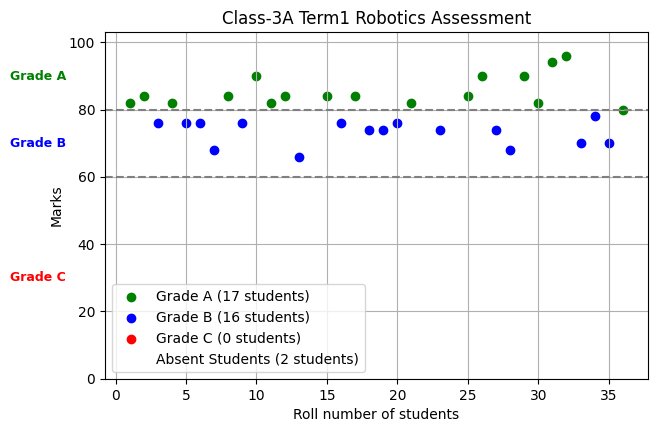

DataFrame for 3B:


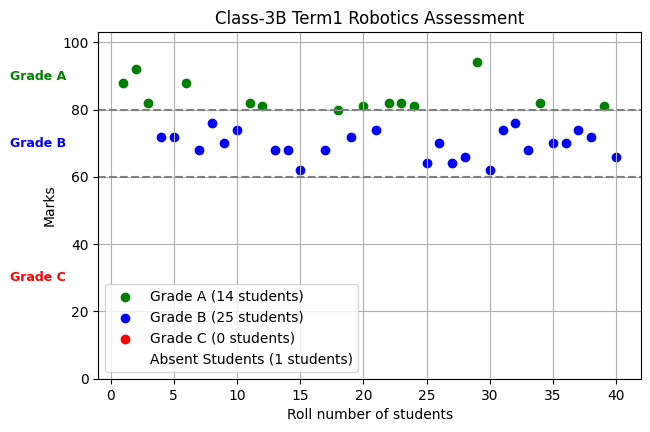

DataFrame for 3C:


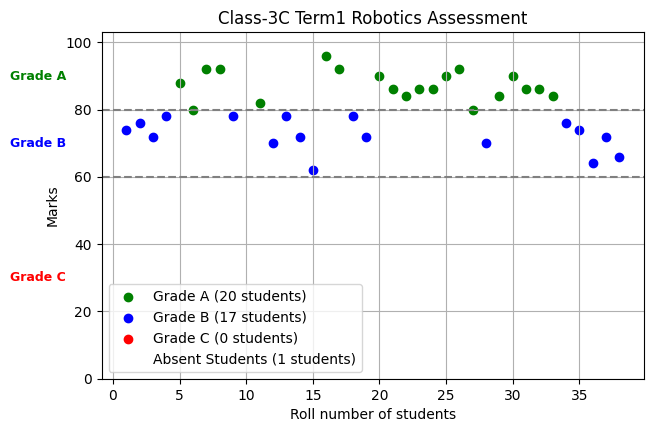

DataFrame for 3D:


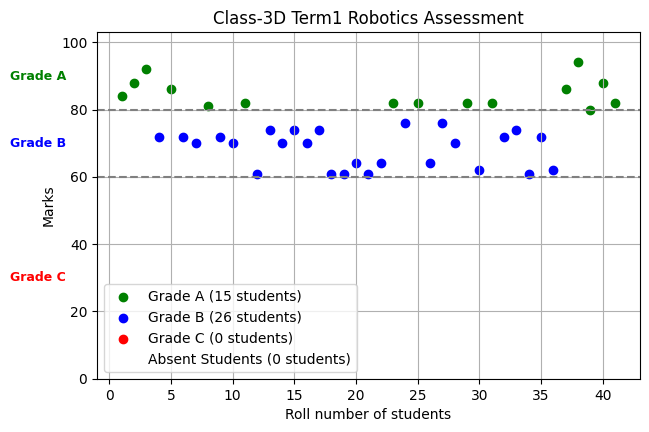

DataFrame for 3E:


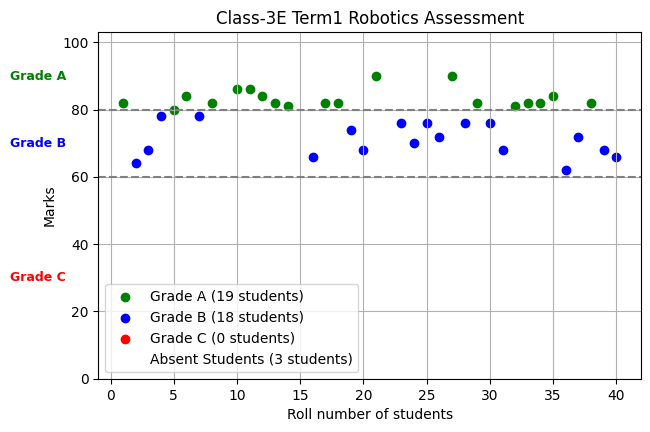

DataFrame for 3F:


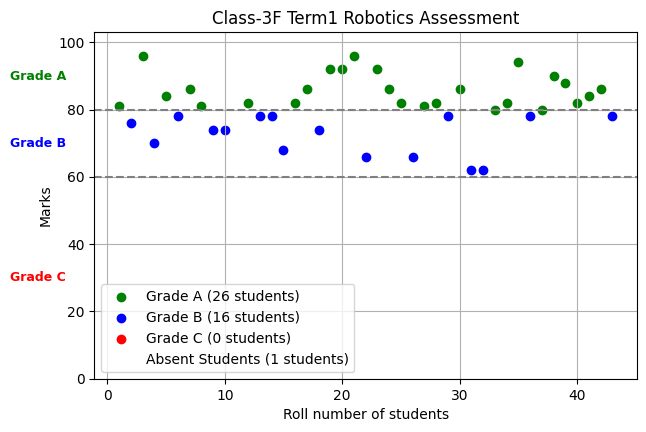

DataFrame for 3G:


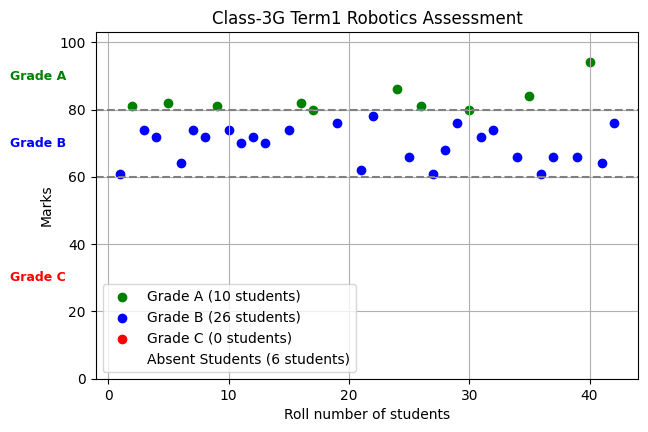

DataFrame for 3H:


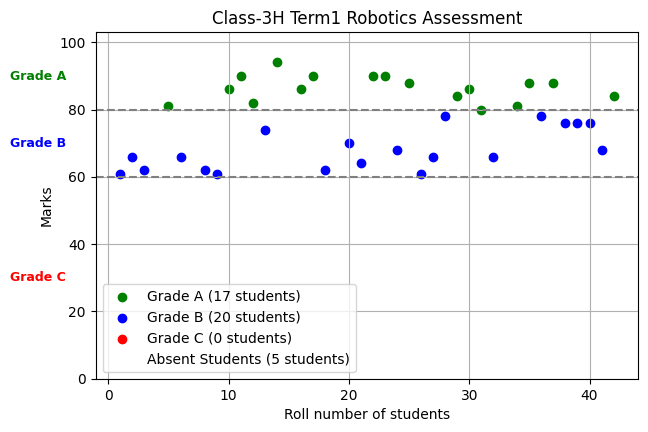

DataFrame for 3I:


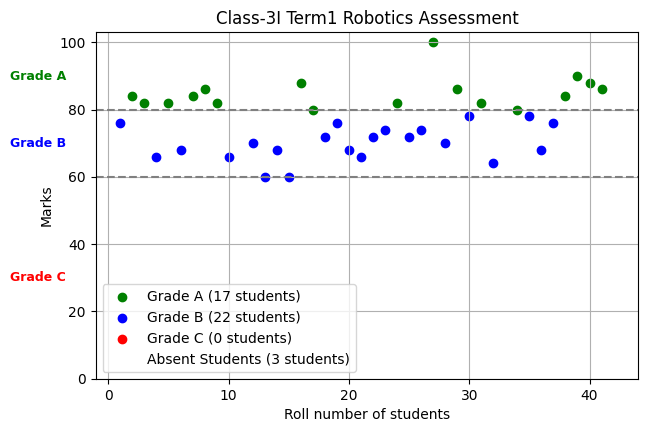

In [ ]:
import matplotlib.pyplot as plt

# Initialize a counter to keep track of the image number
image_counter = 6

# Print the names of the DataFrames
for sheet_name, df in dataframes_dict.items():
    print(f"DataFrame for {sheet_name}:")
    #print(df)

    # Separate data for 'Absent' and non-'Absent' students
    df_absent = df[df['MARKS_OUT_OF_100'] == 'Absent']
    df_present = df[df['MARKS_OUT_OF_100'] != 'Absent']

    # Scatter plot for students with marks (grades A, B, and C)
    plt.figure(figsize=(7, 4.5))

    plt.scatter(df_present[df_present['MARKS_OUT_OF_100'] >= 80]['Roll_no'], df_present[df_present['MARKS_OUT_OF_100'] >= 80]['MARKS_OUT_OF_100'].astype(int), label=f'Grade A ({len(df_present[df_present["MARKS_OUT_OF_100"] >= 80])} students)', color='green')
    plt.scatter(df_present[(df_present['MARKS_OUT_OF_100'] >= 60) & (df_present['MARKS_OUT_OF_100'] < 80)]['Roll_no'], df_present[(df_present['MARKS_OUT_OF_100'] >= 60) & (df_present['MARKS_OUT_OF_100'] < 80)]['MARKS_OUT_OF_100'].astype(int), label=f'Grade B ({len(df_present[(df_present["MARKS_OUT_OF_100"] >= 60) & (df_present["MARKS_OUT_OF_100"] < 80)])} students)', color='blue')
    plt.scatter(df_present[df_present['MARKS_OUT_OF_100'] < 60]['Roll_no'], df_present[df_present['MARKS_OUT_OF_100'] < 60]['MARKS_OUT_OF_100'].astype(int), label=f'Grade C ({len(df_present[df_present["MARKS_OUT_OF_100"] < 60])} students)', color='red')
    plt.scatter(df_absent['Roll_no'], [0] * len(df_absent), label=f'Absent Students ({len(df_absent)} students)', color='white', marker='x')

    plt.xlabel('Roll number of students')
    plt.ylabel('Marks')
    plt.title(f'Class-{sheet_name} Term1 Robotics Assessment')
    plt.ylim(0, 103)  # Set y-axis limits from 0 to 100
    plt.grid(True)   # Enable grid lines

    # Add legend for grades and absent students
    plt.legend()

    # Draw horizontal lines at y=80 and y=60
    plt.axhline(80, color='grey', linestyle='dashed', label='Grade A (80+)')
    plt.axhline(60, color='grey', linestyle='dashed', label='Grade B (60-79)')

    # Add subcategory labels beside y-axis
    plt.text(-3.5, 90, 'Grade A', color='green', fontsize=9, ha='right', va='center', weight='bold')
    plt.text(-3.5, 70, 'Grade B', color='blue', fontsize=9, ha='right', va='center', weight='bold')
    plt.text(-3.5, 30, 'Grade C', color='red', fontsize=9, ha='right', va='center', weight='bold')

    # Save the plot as an image with the specified name format
    image_filename = f"image{image_counter}.png"
    plt.savefig(image_filename)

    # Increment the image counter by 4 for the next iteration
    image_counter += 4

    plt.show()




2 pie chart of grade and marks

DataFrame for 3A:


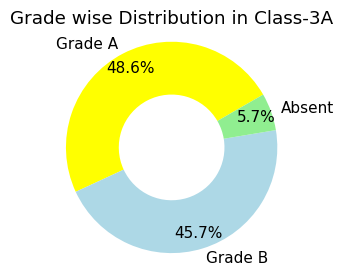

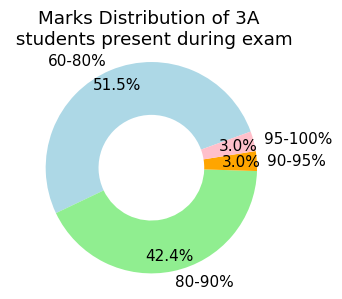

DataFrame for 3B:


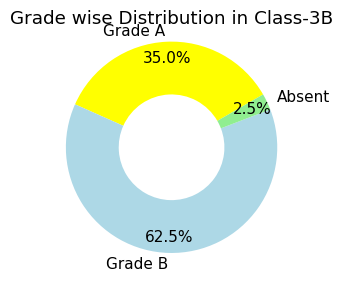

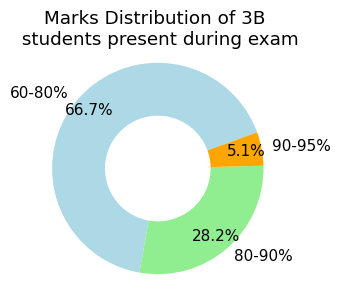

DataFrame for 3C:


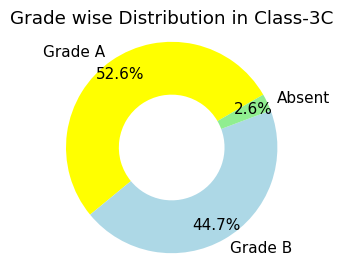

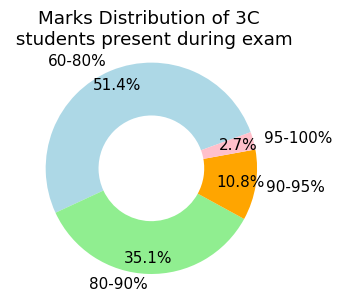

DataFrame for 3D:


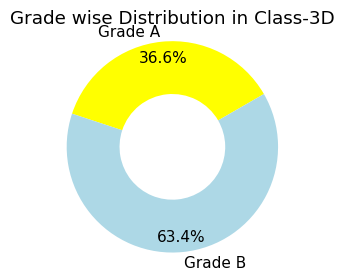

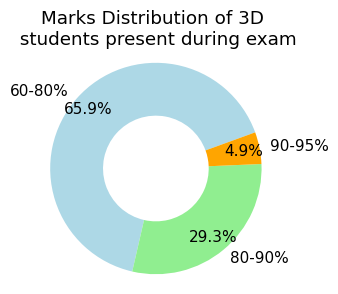

DataFrame for 3E:


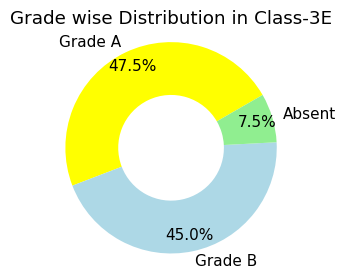

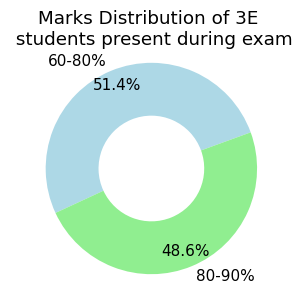

DataFrame for 3F:


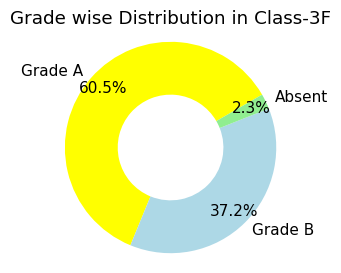

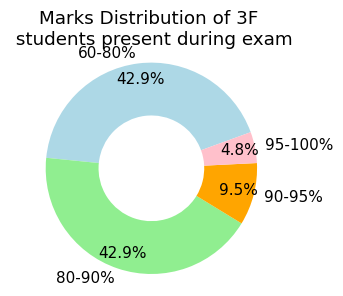

DataFrame for 3G:


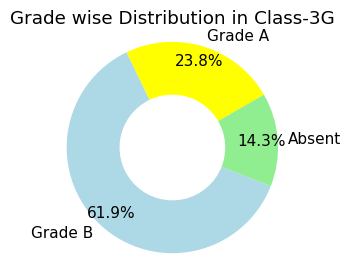

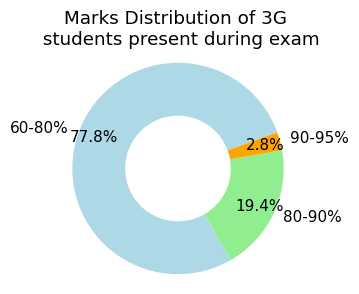

DataFrame for 3H:


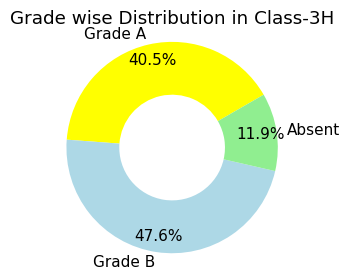

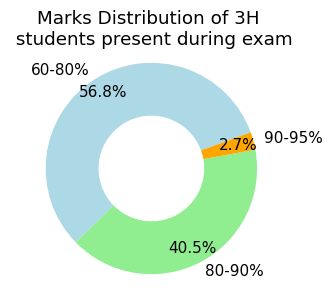

DataFrame for 3I:


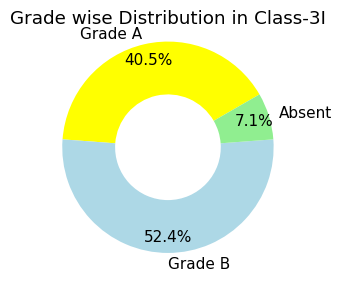

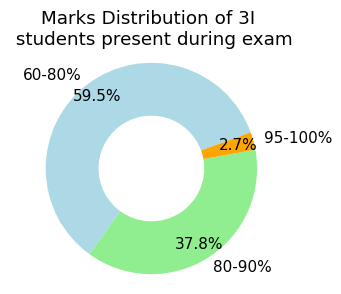

In [ ]:
import matplotlib.pyplot as plt

# Initialize a counter to keep track of the image number
image_counter = 7

# Set the font size for the pie chart labels
plt.rcParams['font.size'] = 11

# Calculate grades for each student
def calculate_grade(mark):
    if pd.notna(mark):
        if mark == 'Absent':
            return 'Absent'
        mark = int(mark)  # Convert mark to an integer
        if 80 <= mark <= 100:
            return 'Grade A'
        elif 60 <= mark < 80:
            return 'Grade B'
        else:
            return 'Grade C'
    else:
        return 'Absent'

# Print the names of the DataFrames and calculate grades
for sheet_name, df in dataframes_dict.items():
    print(f"DataFrame for {sheet_name}:")
    #print(df)

    # Apply grade calculation to each mark
    marks_column = 'MARKS_OUT_OF_100'  # Replace this with the appropriate column name for student marks
    df['Grade'] = df[marks_column].apply(calculate_grade)

    # Pie chart for grade distribution
    grade_counts = df['Grade'].value_counts()
    grade_labels = ['Grade A', 'Grade B', 'Grade C', 'Absent']

    # Remove sections with 0% count from grade_labels and grade_counts
    grade_labels = [label for label in grade_labels if grade_counts.get(label, 0) > 0]
    grade_counts = grade_counts[grade_labels]

    # Sort the grades to ensure the labels and colors match
    grade_counts = grade_counts[grade_labels]

    colors = ['yellow', 'lightblue', 'lightgreen', 'pink']
    plt.figure(figsize=(3, 3))
    plt.pie(grade_counts, labels=grade_labels, colors=colors, autopct='%1.1f%%', startangle=30, pctdistance=0.85, wedgeprops=dict(width=0.5))
    plt.title(f'Grade wise Distribution in Class-{sheet_name}')
    plt.axis('equal')

    # Save the pie chart as an image with the specified name format
    image_filename = f"image{image_counter}.png"
    plt.savefig(image_filename)
    # Increment the image counter by 1 for the next pie chart
    image_counter += 1
    plt.show()




    # Pie chart for student marks distribution (present students)
    marks_bins = [60, 80, 90, 95, 100]
    marks_labels = ['60-80%', '80-90%', '90-95%', '95-100%']

    # Calculate counts for each mark range
    marks_counts = pd.cut(df[df['MARKS_OUT_OF_100'] != 'Absent'][marks_column].astype(float), bins=marks_bins, labels=marks_labels).value_counts()

    # Remove sections with 0% count from marks_labels and marks_counts
    marks_labels = [label for label in marks_labels if marks_counts.get(label, 0) > 0]
    marks_counts = marks_counts[marks_labels]

    # Sort the marks to ensure the labels and colors match
    marks_counts = marks_counts[marks_labels]

    colors = ['lightblue', 'lightgreen', 'orange', 'pink']
    plt.figure(figsize=(3, 3))
    plt.pie(marks_counts, labels=marks_labels, colors=colors, autopct='%1.1f%%', startangle=20, pctdistance=0.85, wedgeprops=dict(width=0.5))
    plt.title(f'Marks Distribution of {sheet_name} \n students present during exam')
    plt.axis('equal')

    # Save the pie chart as an image with the specified name format
    image_filename = f"image{image_counter}.png"
    plt.savefig(image_filename)
    # Increment the image counter by 3 for the iteration first pie chart
    image_counter += 3
    plt.show()


bar chart

DataFrame for 3A:


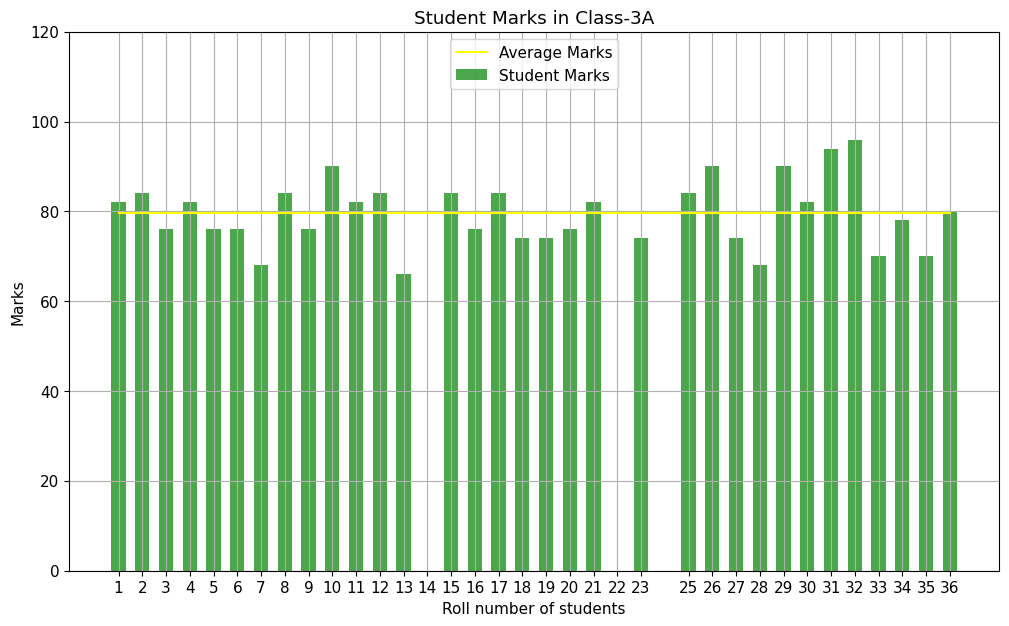

DataFrame for 3B:


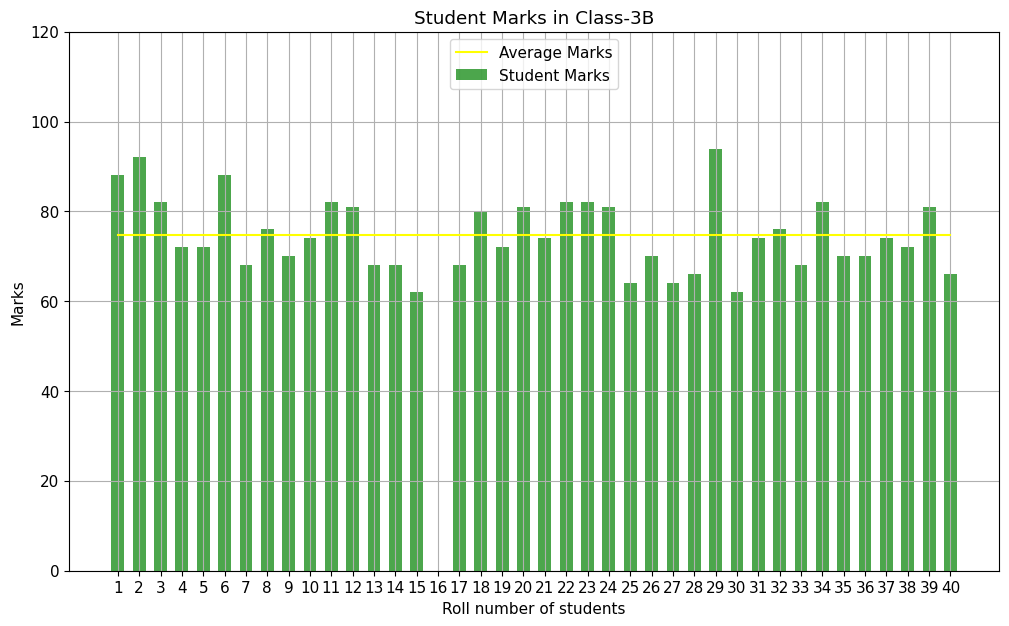

DataFrame for 3C:


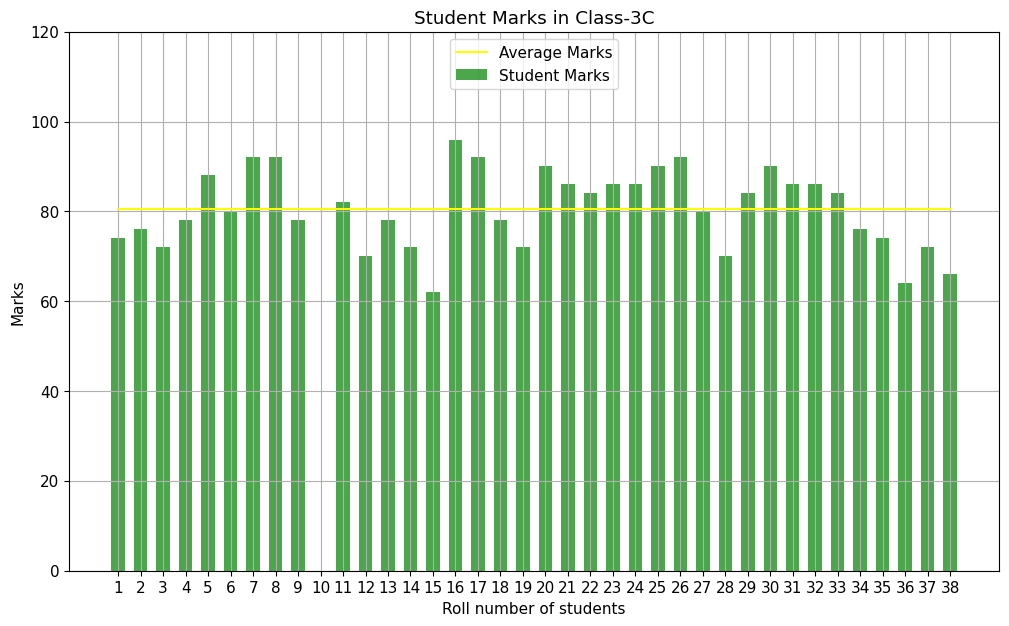

DataFrame for 3D:


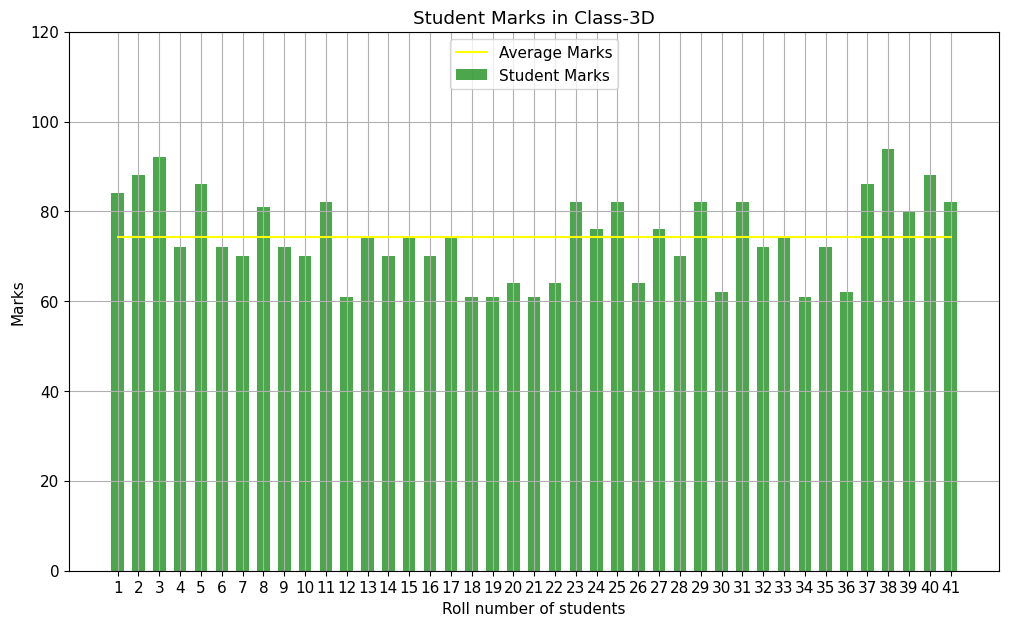

DataFrame for 3E:


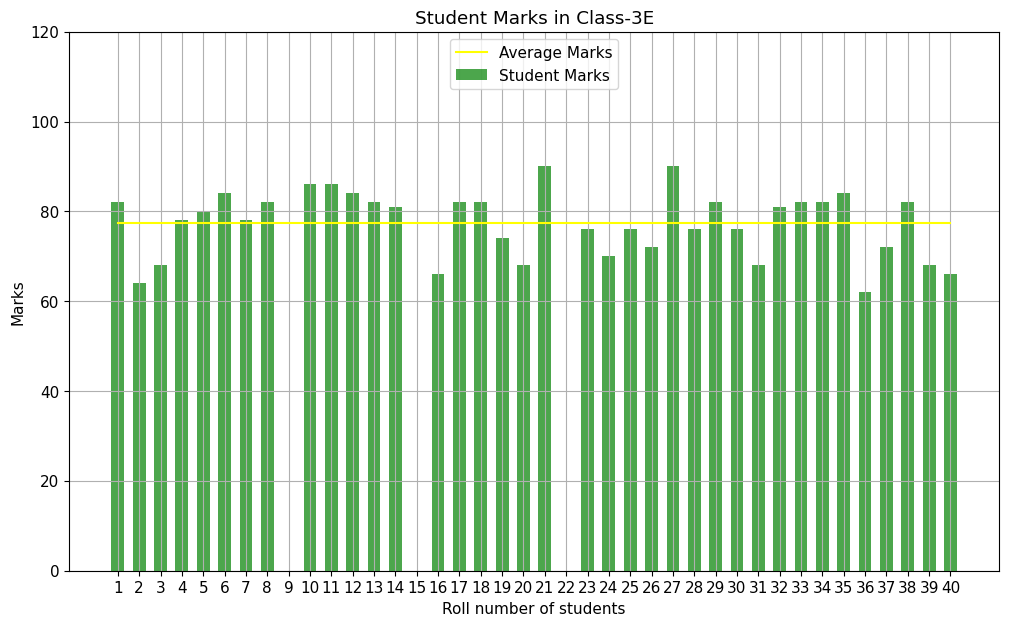

DataFrame for 3F:


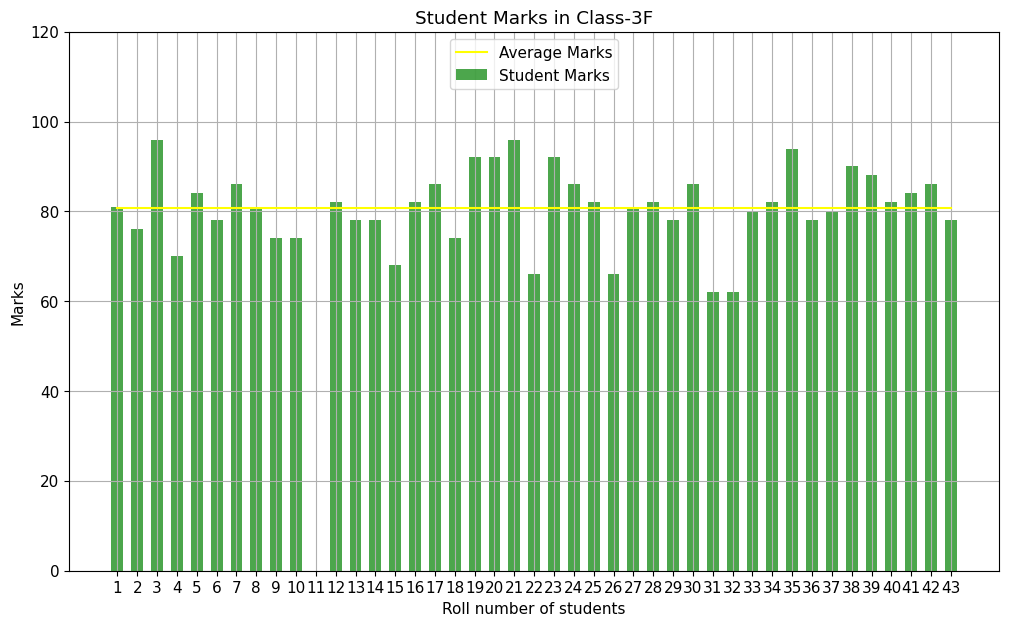

DataFrame for 3G:


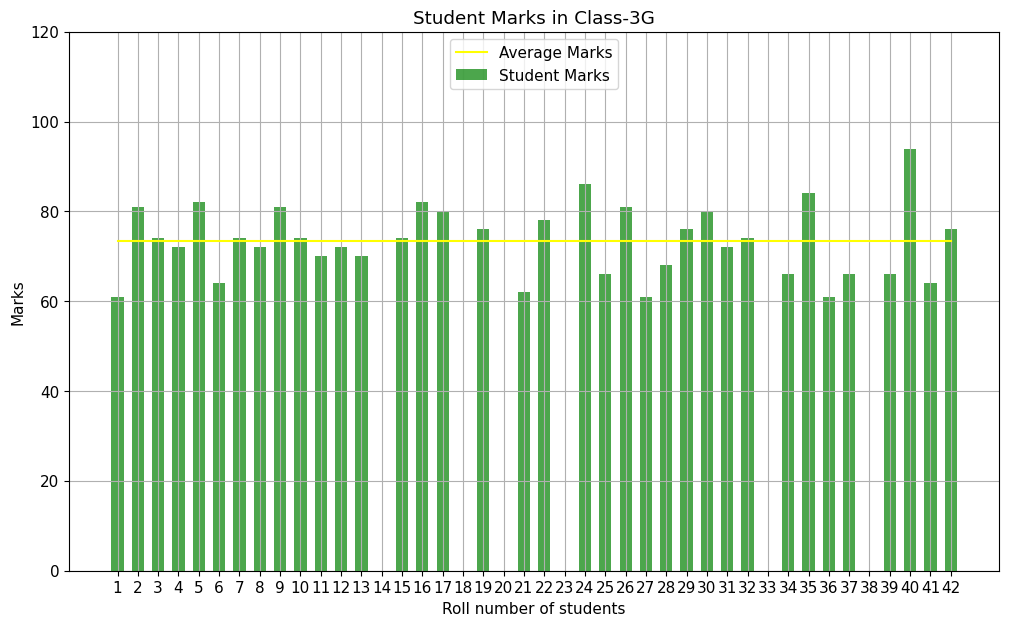

DataFrame for 3H:


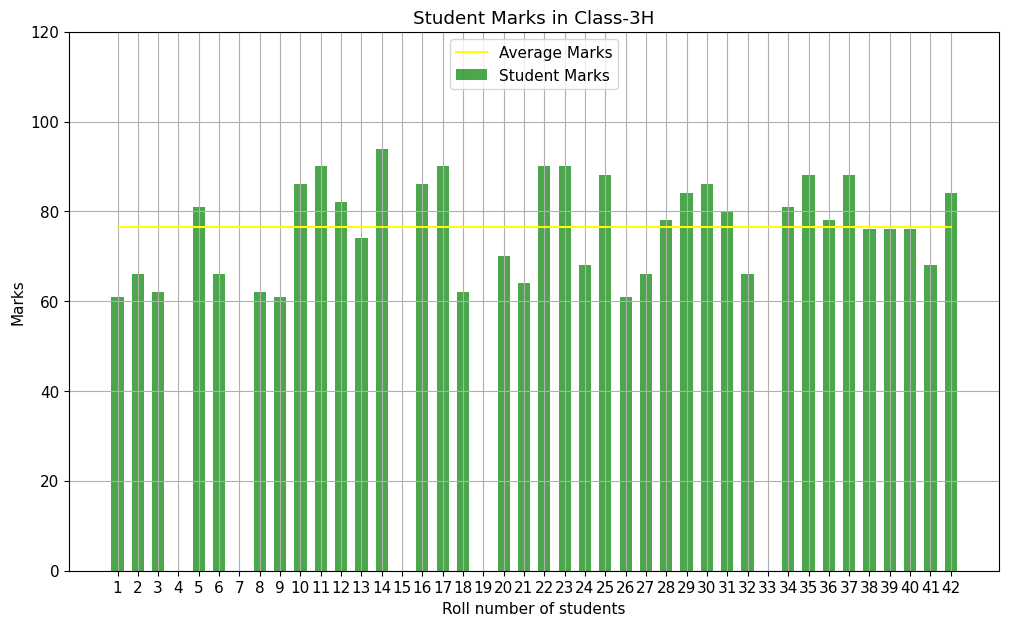

DataFrame for 3I:


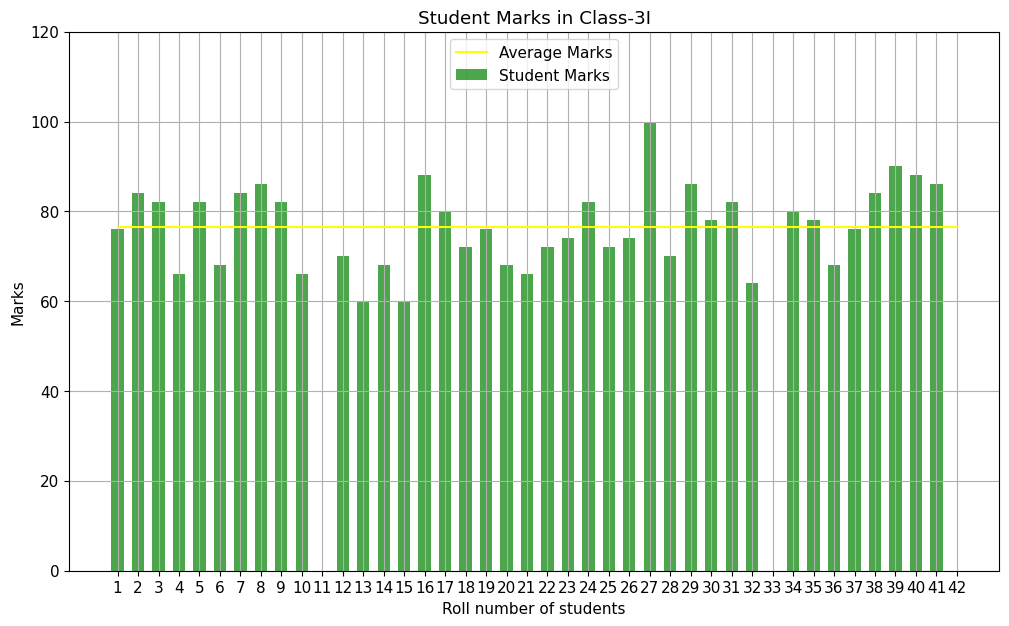

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
image_counter = 9
# Print the names of the DataFrames and calculate grades
for sheet_name, df in dataframes_dict.items():
    print(f"DataFrame for {sheet_name}:")
    #print(df)

    # Apply grade calculation to each mark
    marks_column = 'MARKS_OUT_OF_100'  # Replace this with the appropriate column name for student marks
    df['Grade'] = df[marks_column].apply(calculate_grade)

    # Bar graph for student marks and average marks
    plt.figure(figsize=(12, 7))

    # Convert 'Absent' to NaN to calculate the average marks
    df[marks_column] = pd.to_numeric(df[marks_column], errors='coerce')

    # Calculate average marks for each student
    df['Average_Marks'] = df[marks_column].mean()

    # Set the width of the bars (adjust as needed)
    bar_width = 0.6

    # Generate bar graph
    plt.bar(df['Roll_no'], df[marks_column], label='Student Marks', color='green', alpha=0.7, width=bar_width)
    plt.plot(df['Roll_no'], df['Average_Marks'], color='yellow', label='Average Marks')

    plt.xlabel('Roll number of students')
    plt.ylabel('Marks')
    plt.title(f'Student Marks in Class-{sheet_name}')

    # Set legend position to center at the top
    plt.legend(loc='upper center')

    # Set y-axis limits
    plt.ylim(0, 120)  # Adjust the limits as needed

    plt.grid(True)
    plt.xticks(df['Roll_no'], df['Roll_no'])  # Set x-axis ticks to show the roll numbers

    # Save the plot as an image with the specified name format
    image_filename = f"image{image_counter}.png"
    plt.savefig(image_filename)

    # Increment the image counter by 4 for the next iteration
    image_counter += 4

    plt.show()


In [ ]:
df_section_statistics=pd.read_csv('section_statistics.csv')

In [ ]:
df_section_statistics

,Unnamed: 0,Total Students,Students Absent,Students Present,Grade A Count,Grade B Count,Students (95-100),Students (90-95),Students (80-90),Students (60-80),Average Marks (Present)
0,3A,35,2,33,17,17,1,4,12,16,79.575758
1,3B,40,1,39,13,26,0,2,12,25,74.769231
2,3C,38,1,37,18,19,1,7,12,17,80.486486
3,3D,41,0,41,14,27,0,2,13,26,74.390244
4,3E,40,3,37,18,19,0,2,17,18,77.351351
5,3F,43,1,42,24,18,2,5,19,16,80.785714
6,3G,42,6,36,8,28,0,1,9,26,73.333333
7,3H,42,5,37,16,21,0,5,12,20,76.459459
8,3I,42,3,39,15,22,1,1,15,22,76.615385


In [ ]:
# Rename the columns as required
df_section_statistics = df_section_statistics.rename(columns={
    'Unnamed: 0': 'Section',
    'Students (95-100)': 'Student Marks (95-100)',
    'Students (90-95)': 'Student Marks (90-95)',
    'Students (80-90)': 'Student Marks (80-90)',
    'Students (60-80)': 'Student Marks (60-80)',
    'Average Marks (Present)': 'Average Marks of Section'
})

# Format the "Average Marks of Section" column to show values with two decimal points
df_section_statistics['Average Marks of Section'] = df_section_statistics['Average Marks of Section'].round(2)

# Save the updated dataframe to a new CSV file
updated_stats_csv_file_name = 'updated_section_statistics.csv'
df_section_statistics.to_csv(updated_stats_csv_file_name, index=False)

print("Columns renamed and formatting applied. Updated statistics have been saved.")


Columns renamed and formatting applied. Updated statistics have been saved.


In [ ]:
df_final_section_statistics=pd.read_csv('updated_section_statistics.csv')
df_final_section_statistics

,Section,Total Students,Students Absent,Students Present,Grade A Count,Grade B Count,Student Marks (95-100),Student Marks (90-95),Student Marks (80-90),Student Marks (60-80),Average Marks of Section
0,3A,35,2,33,17,17,1,4,12,16,79.58
1,3B,40,1,39,13,26,0,2,12,25,74.77
2,3C,38,1,37,18,19,1,7,12,17,80.49
3,3D,41,0,41,14,27,0,2,13,26,74.39
4,3E,40,3,37,18,19,0,2,17,18,77.35
5,3F,43,1,42,24,18,2,5,19,16,80.79
6,3G,42,6,36,8,28,0,1,9,26,73.33
7,3H,42,5,37,16,21,0,5,12,20,76.46
8,3I,42,3,39,15,22,1,1,15,22,76.62


In [ ]:
# Extracting values from each column and storing them in separate lists
sections = df_final_section_statistics['Section'].tolist()
total_students = df_final_section_statistics['Total Students'].tolist()
students_present = df_final_section_statistics['Students Present'].tolist()
students_absent = df_final_section_statistics['Students Absent'].tolist()
marks_95_100 = df_final_section_statistics['Student Marks (95-100)'].tolist()
marks_90_95 = df_final_section_statistics['Student Marks (90-95)'].tolist()
marks_80_90 = df_final_section_statistics['Student Marks (80-90)'].tolist()
marks_60_80 = df_final_section_statistics['Student Marks (60-80)'].tolist()
average_marks = df_final_section_statistics['Average Marks of Section'].tolist()

In [ ]:
#print the values
print("Sections:", sections)
print("Total Students:", total_students)
print("Students Present:", students_present)
print("Students Absent:", students_absent)
print("Marks (95-100):", marks_95_100)
print("Marks (90-95):", marks_90_95)
print("Marks (80-90):", marks_80_90)
print("Marks (60-80):", marks_60_80)
print("Average Marks:", average_marks)

Sections: ['3A', '3B', '3C', '3D', '3E', '3F', '3G', '3H', '3I']
Total Students: [35, 40, 38, 41, 40, 43, 42, 42, 42]
Students Present: [33, 39, 37, 41, 37, 42, 36, 37, 39]
Students Absent: [2, 1, 1, 0, 3, 1, 6, 5, 3]
Marks (95-100): [1, 0, 1, 0, 0, 2, 0, 0, 1]
Marks (90-95): [4, 2, 7, 2, 2, 5, 1, 5, 1]
Marks (80-90): [12, 12, 12, 13, 17, 19, 9, 12, 15]
Marks (60-80): [16, 25, 17, 26, 18, 16, 26, 20, 22]
Average Marks: [79.58, 74.77, 80.49, 74.39, 77.35, 80.79, 73.33, 76.46, 76.62]


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named df_final_section_statistics
# To transpose the DataFrame:
df_transposed = df_final_section_statistics.T
df_transposed
# Save the transposed DataFrame to a CSV file
csv_filename = 'transposed_data.csv'
df_transposed.to_csv(csv_filename, index=False)

print("Transposed DataFrame saved to:", csv_filename)
df_transposed


Transposed DataFrame saved to: transposed_data.csv


,0,1,2,3,4,5,6,7,8
Section,3A,3B,3C,3D,3E,3F,3G,3H,3I
Total Students,35,40,38,41,40,43,42,42,42
Students Absent,2,1,1,0,3,1,6,5,3
Students Present,33,39,37,41,37,42,36,37,39
Grade A Count,17,13,18,14,18,24,8,16,15
Grade B Count,17,26,19,27,19,18,28,21,22
Student Marks (95-100),1,0,1,0,0,2,0,0,1
Student Marks (90-95),4,2,7,2,2,5,1,5,1
Student Marks (80-90),12,12,12,13,17,19,9,12,15
Student Marks (60-80),16,25,17,26,18,16,26,20,22


In [ ]:
import numpy as np

In [ ]:
# Ask the user for the class number
class_number = input("Enter the class number: ")

Enter the class number: 3


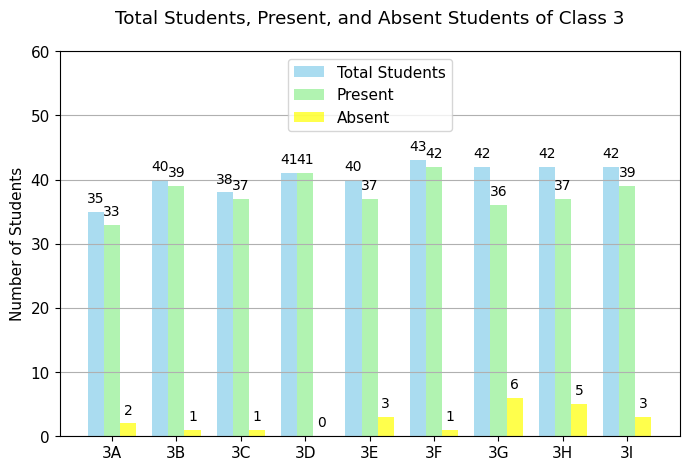

In [ ]:
# Bar positions
bar_width = 0.25
bar_positions_total = np.arange(len(sections))
bar_positions_present = bar_positions_total + bar_width
bar_positions_absent = bar_positions_total + 2 * bar_width

# Plotting bar graph 1: Total students, students present, and students absent
plt.figure(figsize=(8, 5))
plt.bar(bar_positions_total, total_students, label='Total Students', color='skyblue', width=bar_width, alpha=0.7)
plt.bar(bar_positions_present, students_present, label='Present', color='lightgreen', width=bar_width, alpha=0.7)
plt.bar(bar_positions_absent, students_absent, label='Absent', color='yellow', width=bar_width, alpha=0.7)

plt.ylabel('Number of Students')
plt.title(f'Total Students, Present, and Absent Students of Class {class_number}', pad=20)  # Use the class_number entered by the user
plt.legend(loc='upper center')  # Move the legend to the upper left corner
plt.grid(True, axis='y')
plt.xticks(bar_positions_total + bar_width, sections, rotation=0)

# Annotate total students, present, and absent count within each bar
for i, section in enumerate(sections):
    plt.annotate(total_students[i], xy=(bar_positions_total[i], total_students[i] + 1), ha='center', va='bottom', fontsize=10, color='black')
    plt.annotate(students_present[i], xy=(bar_positions_present[i], students_present[i] + 1), ha='center', va='bottom', fontsize=10, color='black')
    plt.annotate(students_absent[i], xy=(bar_positions_absent[i], students_absent[i] + 1), ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(0, 60)  # Set the y-axis height to 60
# Save the plot as an image
plt.savefig('image1.png')
plt.show()


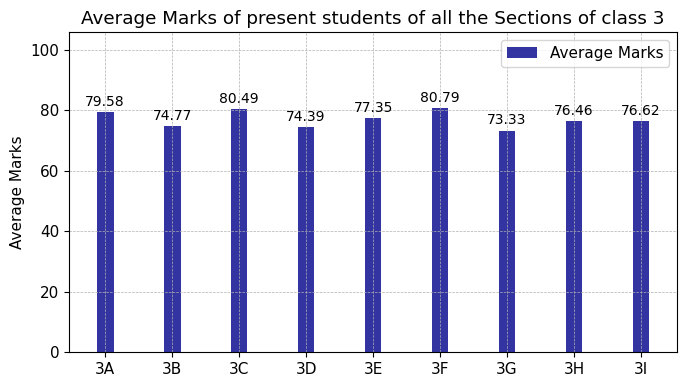

In [ ]:
# Bar positions
bar_width = 0.25
bar_positions = np.arange(len(sections))

# Plotting bar graph 2: Average marks in each section
plt.figure(figsize=(7, 4))
plt.bar(bar_positions, average_marks, label='Average Marks', color='darkblue', alpha=0.8, width=bar_width)

plt.ylabel('Average Marks')
plt.title(f'Average Marks of present students of all the Sections of class {class_number}')
plt.legend()
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Annotate average marks value on top of each bar
for i, section in enumerate(sections):
    plt.annotate(average_marks[i], xy=(bar_positions[i], average_marks[i] + 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(bar_positions, sections, rotation=0)
plt.ylim(0, max(average_marks) + 25)  # Set the y-axis height to the maximum value + 10
plt.tight_layout()

# Save the plot as an image
plt.savefig('image4.png')

plt.show()

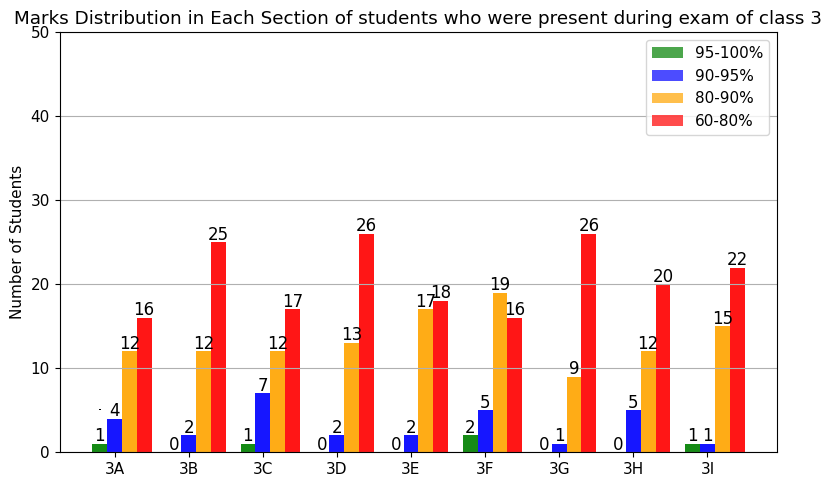

In [ ]:
# Bar positions
bar_width = 0.20
bar_positions_95_100 = np.arange(len(sections))
bar_positions_90_95 = bar_positions_95_100 + bar_width
bar_positions_80_90 = bar_positions_95_100 + 2 * bar_width
bar_positions_60_80 = bar_positions_95_100 + 3 * bar_width

# Plotting bar graph 3: Marks distribution in each section
plt.figure(figsize=(8, 5))
plt.bar(bar_positions_95_100, marks_95_100, label='95-100%', color='green', width=bar_width, alpha=0.7)
plt.bar(bar_positions_90_95, marks_90_95, label='90-95%', color='blue', width=bar_width, alpha=0.7)
plt.bar(bar_positions_80_90, marks_80_90, label='80-90%', color='orange', width=bar_width, alpha=0.7)
plt.bar(bar_positions_60_80, marks_60_80, label='60-80%', color='red', width=bar_width, alpha=0.7)

plt.ylabel('Number of Students')
plt.title(f'Marks Distribution in Each Section of students who were present during exam of class {class_number}')
plt.legend()
plt.grid(True, axis='y')
plt.xticks(bar_positions_90_95, sections, rotation=0)

# Annotate number of students and marks range above each bar
def annotate_bar_heights(bars, marks_range):
    for bar, marks_count in zip(bars, marks_range):
        height = bar.get_height()
        plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 5),
                     ha='center', va='bottom', fontsize=0, color='black')
        plt.annotate(f'{marks_count}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, -1),
                     textcoords="offset points", ha='center', va='bottom', fontsize=12, color='black')

# Annotate number of students and marks range above each bar for all four marks ranges
annotate_bar_heights(plt.bar(bar_positions_95_100, marks_95_100, label='95-100%', color='green', width=bar_width, alpha=0.7), marks_95_100)
annotate_bar_heights(plt.bar(bar_positions_90_95, marks_90_95, label='90-95%', color='blue', width=bar_width, alpha=0.7), marks_90_95)
annotate_bar_heights(plt.bar(bar_positions_80_90, marks_80_90, label='80-90%', color='orange', width=bar_width, alpha=0.7), marks_80_90)
annotate_bar_heights(plt.bar(bar_positions_60_80, marks_60_80, label='60-80%', color='red', width=bar_width, alpha=0.7), marks_60_80)

plt.tight_layout()
plt.ylim(0,50)

# Save the plot as an image
plt.savefig('image5.png')

plt.show()